In [4]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
import datetime as dt

In [5]:
start = dt.datetime(2021,1,1)
end = dt.datetime(2021,6,1)
data = web.DataReader("IBM",'yahoo', start, end).reset_index()

In [6]:
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-12-31,126.029999,123.989998,124.220001,125.879997,3574400.0,122.847458
1,2021-01-04,125.919998,123.040001,125.849998,123.940002,5179200.0,120.954201
2,2021-01-05,126.680000,124.610001,125.010002,126.139999,6114600.0,123.101204
3,2021-01-06,131.880005,126.720001,126.900002,129.289993,7956700.0,126.175316
4,2021-01-07,130.460007,128.259995,130.039993,128.990005,4507400.0,125.882545


In [7]:
close = data['Close']

In [32]:

def get_macd(price, slow, fast, smooth):
    exp1 = price.ewm(span = fast, adjust = False).mean()
    exp2 = price.ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1 - exp2)
    macd.columns = ["macd"]

    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean())
    signal.columns = ["signal"]
    
    hist = pd.DataFrame(macd['macd'] - signal['signal'])
    hist.columns = ["hist"]
    print(hist.columns)
    frames =  [macd, signal, hist]
    df = pd.concat(frames, join = 'inner', axis = 1)
    return df


In [33]:
macd = get_macd(close, 26, 12, 9)


Index(['hist'], dtype='object')


In [35]:
macd.head()

,macd,signal,hist
0,0.000000,0.000000,0.000000
1,-0.154757,-0.030951,-0.123806
2,-0.098744,-0.044510,-0.054234
3,0.197548,0.003902,0.193646
4,0.403503,0.083822,0.319681


In [49]:
def plot_macd(prices, macd, signal, hist):
    plt.figure(figsize=(18, 10))
    ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)
    ax2.plot(macd, color = 'grey', linewidth = 1.5, label = 'MACD')
    ax2.plot(signal, color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

    for i in range(len(prices)):
        if str(hist[i])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color = '#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color = '#26a69a')

    plt.legend(loc = 'lower right')



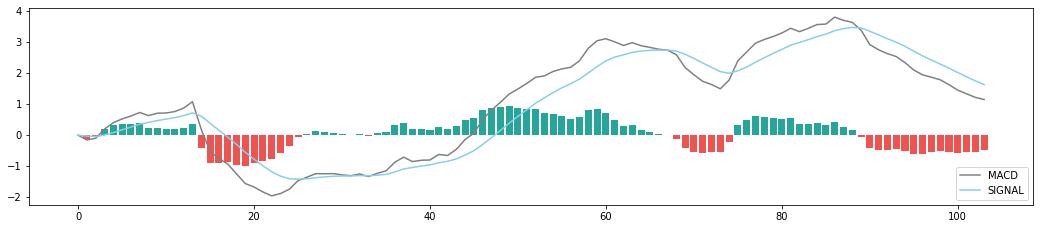

In [50]:
plot_macd(close, macd['macd'], macd['signal'], macd['hist'])